# Reference:
* [Automating Puzzle Solving With Python](https://betterprogramming.pub/automating-puzzle-solving-with-python-f3ecc242e059)
* [Optimization Problem Types](https://neos-guide.org/guide/types/)
* Shapely

In [53]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from skimage import draw

In [ ]:
'''Question:
1. How do COC1 & COC2 move (Grid only or slash is okay?)
2. Laser Frame position is fixed?

'''


''' Flow (First)
Random initial position (COC1, COC2)

While defect number != 0:
    
    COC2 pick nearest and laregest defect number position
    COC1 pick nearest and max-match posiion 
    Record match point and update chip state
    Calculate the distance (Manhattan distance?)
    Find a position that let COC1 & COC2 can move
    Update new position
    Calculate moving time
'''

# Main Action:
## 1. Pick a group of chipsets from the wafer to fit the defect on the panel
* 
　
## 2. Calculate the distance in each run of pick
* Manhattan distance

## 3. Convert each distance into a couple of movement routes ( COC1, COC2)
* midpoint of LineString
* update the new location

## 4. Calculate the time in each couple of movement routes
* pick the longest (COC1 or COC2) move distence in each movement routes

In [73]:
# Try Algorithm
* R-tree
* genetic programming
* Simulated Annealing
* Ant Colony Optimization


# Function

In [68]:
def generate_uLED_panel_with_random_defect(size: tuple, defect_rate=0.01):
    
    return np.random.choice([0, 1], size=size, p=[defect_rate, 1-defect_rate])


def generate_wafer_with_random_defect(size, defect_rate=0.01):
    size = (24, 24)
    arr = np.zeros(size).astype(int)
    rr, cc = draw.disk((size[0]/2, size[1]/2), radius=size[0]/2, shape=arr.shape)
    arr[rr, cc] = 1
    
    CIRCLE_SQUARE_AREA_RATIO = 0.785
    n_defect = int(defect_rate * size[0] * size[1] / CIRCLE_SQUARE_AREA_RATIO) 
    rr = np.random.choice(size[0], n_defect, replace=False)
    cc = np.random.choice(size[1], n_defect, replace=False)
    arr[rr, cc] = 0
    
    return arr

# Test

In [50]:
def test_generate_uLED_panel_with_random_defect():
    result = generate_uLED_panel_with_random_defect((25, 25), 0.2)
    assert result.shape == (25, 25)
    assert 1 - result.sum()/(25*25) <= (0.2 * 1.1)

test_generate_uLED_panel_with_random_defect()






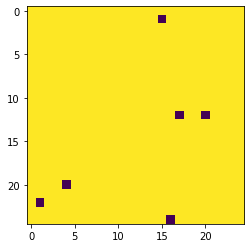

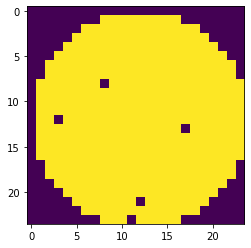

In [72]:
plt.imshow(generate_uLED_panel_with_random_defect((25, 25)))
plt.show()
plt.imshow(generate_wafer_with_random_defect((30, 30), defect_rate=0.01))
plt.show()